In [26]:
import pandas as pd  
import numpy as np 
import tensorflow as tf
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,96.0,29.447917,2.325464,23.0,28.0,29.0,31.0,37.0
MaxTemp,96.0,32.604167,2.341745,26.0,31.0,33.0,34.0,36.0
MinTemp,96.0,26.197917,3.157680,20.0,24.0,26.0,28.0,38.0
meantempm_1,96.0,28.468750,2.307667,24.0,27.0,29.0,30.0,33.0
maxpressurem,96.0,1005.989583,4.186431,998.0,1003.0,1006.0,1010.0,1014.0
minpressurem,96.0,1002.593750,3.652189,995.0,1000.0,1003.0,1006.0,1009.0
maxdew,96.0,24.187500,1.284011,21.0,23.0,24.0,25.0,26.0
mindew,96.0,21.375000,0.954215,20.0,21.0,21.0,22.0,23.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 01-Apr-19 to 05-Jul-19
Data columns (total 15 columns):
meantempm         96 non-null int64
MaxTemp           96 non-null int64
MinTemp           96 non-null int64
meantempm_1       96 non-null int64
meanhumidity      96 non-null object
maxhumidity       96 non-null object
minhumidity       96 non-null object
meanhumidity_1    96 non-null object
meanpressurem     96 non-null object
maxpressurem      96 non-null int64
minpressurem      96 non-null int64
precipm           96 non-null object
windspeed         96 non-null object
maxdew            96 non-null int64
mindew            96 non-null int64
dtypes: int64(8), object(7)
memory usage: 12.0+ KB


In [8]:
# droping the maxtemp and mintemp from the dataframe
df = df.drop(['MinTemp', 'MaxTemp'], axis=1)

In [9]:
# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

In [10]:
# y will be a pandas series of the meantempm
y = df['meantempm']

In [11]:
X

,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,
01-Apr-19,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20
06-Apr-19,26,73.50%,91%,56%,71.00%,1008%,1010,1006,154.5mm,3mph,24,21
07-Apr-19,30,71.50%,93%,50%,70.00%,1010%,1012,1008,153.5mm,3mph,24,22
08-Apr-19,31,69.50%,95%,44%,68.00%,1011%,1013,1009,150.6mm,6mph,25,21
09-Apr-19,29,53.50%,67%,40%,52.00%,1010%,1012,1008,151.6mm,3mph,23,20


In [28]:
y

date
01-Apr-19    27
02-Apr-19    26
03-Apr-19    29
04-Apr-19    28
05-Apr-19    29
06-Apr-19    27
07-Apr-19    27
08-Apr-19    28
09-Apr-19    31
10-Apr-19    31
11-Apr-19    28
12-Apr-19    27
13-Apr-19    27
14-Apr-19    32
15-Apr-19    27
16-Apr-19    30
17-Apr-19    26
18-Apr-19    27
19-Apr-19    29
20-Apr-19    30
21-Apr-19    28
22-Apr-19    29
23-Apr-19    30
24-Apr-19    29
25-Apr-19    28
26-Apr-19    28
27-Apr-19    27
28-Apr-19    29
29-Apr-19    23
30-Apr-19    25
             ..
06-Jun-19    29
07-Jun-19    29
08-Jun-19    30
09-Jun-19    28
10-Jun-19    33
11-Jun-19    29
12-Jun-19    33
13-Jun-19    33
14-Jun-19    31
15-Jun-19    28
16-Jun-19    31
17-Jun-19    32
18-Jun-19    30
19-Jun-19    32
20-Jun-19    31
21-Jun-19    31
22-Jun-19    32
23-Jun-19    34
24-Jun-19    33
25-Jun-19    32
26-Jun-19    32
27-Jun-19    30
28-Jun-19    30
29-Jun-19    31
30-Jun-19    31
01-Jul-19    31
02-Jul-19    27
03-Jul-19    32
04-Jul-19    29
05-Jul-19    29
Name: meantempm, Le

In [29]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  

In [30]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))  

Training instances   76, Training features   12
Validation instances 10, Validation features 12
Testing instances    10, Testing features    12


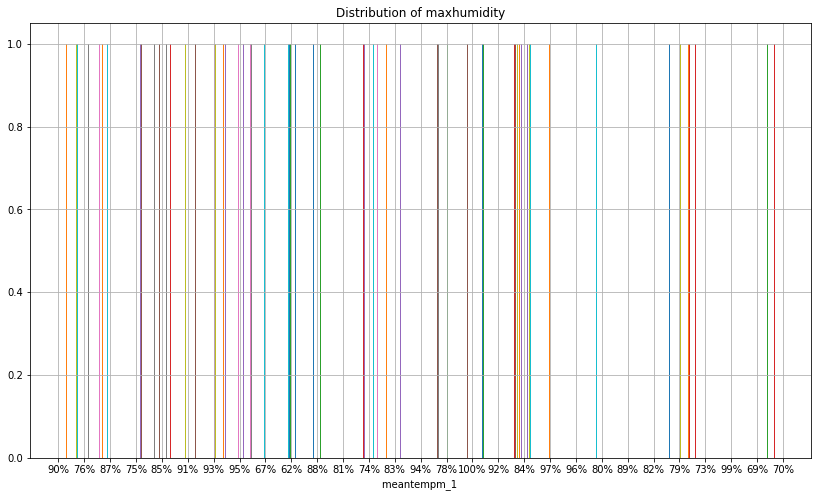

In [32]:
plt.rcParams['figure.figsize'] = [14, 8]  
df.maxhumidity.hist()  
plt.title('Distribution of maxhumidity')  
plt.xlabel('meantempm_1 ')  
plt.show()  